In [1]:
#learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa

# Food calorie predictor

### Data Source

    U.S. DEPARTMENT OF AGRICULTURE

##### Food and Nutrient Database for Dietary Studies (FNDDS) 

    - License: ---
    - Donor: U.S. DEPARTMENT OF AGRICULTURE
    - Source Link: https://fdc.nal.usda.gov/download-datasets.html
    - Download: https://fdc.nal.usda.gov/fdc-datasets/FoodData_Central_foundation_food_csv_2020-10-30.zip
    - Data last updated: ---
    - Origin: --
    - Citation: --

### Import libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model


import os

In [33]:
### Check version
import sys
import sklearn
print(sys.version)
!python --version
print("numpy: ", np.__version__)
print("sklearn: ", sklearn.__version__)

3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
Python 3.8.3
numpy:  1.19.5
sklearn:  0.24.0


In [34]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Part - I



Work around:
    - typo in file names or column names
    - missing tables
    - primary id's do not match
    - several zeros, nan's
    - description of each variable

In [35]:
# Set path to data folder
path = '/Users/erv/Desktop/Food/FoodData_Central_csv_2020-10-30'

In [38]:
# Read all the files
# Put them in a dictionary

data = {}
for root, dirs, files in os.walk(path):
    #print(root,'\n', dirs, '\n', files )
    
    for file in files:
        fname = file.split('.')[0]
        ext = file.split('.')[1]
        if(ext=='csv'):
            data[fname] = pd.read_csv(os.path.join(root, file))
        
    

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [40]:
data.keys()

dict_keys(['food_calorie_conversion_factor', 'food_nutrient_derivation', 'sr_legacy_food', 'branded_food', 'food_nutrient_conversion_factor', 'food_attribute_type', 'food_attribute', 'market_acquisition', 'retention_factor', 'foundation_food', 'food_update_log_entry', 'measure_unit', 'sub_sample_result', 'nutrient', 'all_downloaded_table_record_counts', 'food', 'wweia_food_category', 'fndds_ingredient_nutrient_value', 'lab_method_nutrient', 'food_nutrient', 'sample_food', 'input_food', 'lab_method_code', 'acquisition_samples', 'agricultural_acquisition', 'fndds_derivation', 'food_nutrient_source', 'food_protein_conversion_factor', 'sub_sample_food', 'food_portion', 'food_component', 'survey_fndds_food', 'lab_method', 'food_category', 'nutrient_incoming_name'])

In [41]:
data['food_calorie_conversion_factor']

,food_nutrient_conversion_factor_id,protein_value,fat_value,carbohydrate_value
0,22721,4.27,9.02,3.87
1,22722,4.27,8.79,3.87
2,22723,2.44,8.37,3.57
3,22724,4.27,9.02,3.87
4,22725,4.05,8.37,4.12
...,...,...,...,...
4819,12167,2.44,8.37,3.57
4820,12168,2.78,8.37,3.84
4821,12169,2.44,8.37,3.57
4822,12170,2.78,8.37,3.84


# Part II

    - Branded Food

In [42]:
def drop_nan_dups_cols(dfx, threshold):
    dfx = dfx.drop_duplicates()
    
    for col in dfx.columns:
        sum_nan = dfx[col].isna().sum()
        if(sum_nan >= threshold):
            dfx = dfx.drop([col], axis=1)
    return dfx

In [59]:
# Branded food

df = data['food_nutrient'].merge(data['nutrient'], left_on='nutrient_id', right_on='id', how='inner')
print(df.shape)

df = df.merge(data['branded_food'], on='fdc_id', how='inner')
print(df.shape)


df = drop_nan_dups_cols(df, 50000)
print(df.shape)

(7547844, 16)
(6345119, 28)
(6345119, 20)


In [60]:
df[df['fdc_id']==344646].head(2)

,id_x,fdc_id,nutrient_id,amount,derivation_id,id_y,name,unit_name,nutrient_nbr,rank,brand_owner,gtin_upc,ingredients,serving_size,serving_size_unit,household_serving_fulltext,data_source,modified_date,available_date,market_country
3260979,6228540,344646,1003,5.2,78.0,1003,Protein,G,203.0,600.0,Kellogg Company US,38000162367,"SUGAR, CORN FLOUR BLEND (WHOLE GRAIN YELLOW CO...",25.0,g,1 Pouch,GDSN,2016-12-19,2019-04-01,United States
3260980,6228543,344646,1007,0.8,78.0,1007,Ash,G,207.0,1000.0,Kellogg Company US,38000162367,"SUGAR, CORN FLOUR BLEND (WHOLE GRAIN YELLOW CO...",25.0,g,1 Pouch,GDSN,2016-12-19,2019-04-01,United States


In [155]:
remove_fdc_id = df[df['unit_name']=='kJ']['fdc_id']

X = df[(df['name']!='Energy') & (~df['fdc_id'].isin(remove_fdc_id))][['fdc_id', 'amount', 'name']].drop_duplicates()
y = df[(df['name']=='Energy') & (~df['fdc_id'].isin(remove_fdc_id))][['fdc_id', 'amount', 'name']].drop_duplicates()

In [156]:
print(X.shape)
X.head(2)

(5881529, 3)


,fdc_id,amount,name
0,349386,0.0,Protein
1,349386,0.0,"Fiber, total dietary"


In [157]:
print(y.shape)
y.head(2)

(463458, 3)


,fdc_id,amount,name
9,349386,300.0,Energy
18,532508,0.0,Energy


#### Convert rows to columns: Pivot

In [158]:
X = pd.pivot_table(X, values=['amount'], index='fdc_id', columns='name')


X = drop_nan_dups_cols(X, 50000)
X.columns = [x[1] for x in X.columns]

print(X.shape)
X.head(2)

(277788, 8)


,"Carbohydrate, by difference","Fatty acids, total saturated","Fatty acids, total trans","Fiber, total dietary",Protein,"Sodium, Na","Sugars, total including NLEA",Total lipid (fat)
fdc_id,,,,,,,,
344604,4.07,0.0,0.0,0.8,0.81,203.0,2.44,0.41
344605,4.07,0.0,0.0,0.8,0.81,203.0,2.44,0.41


#### Merge

In [159]:
X = X.merge(y[['fdc_id', 'amount']], on='fdc_id', how='inner')
X = X.fillna(0)
X = X[X['amount']!=0]

#### Remove outliers

In [160]:
q1 = X.quantile(0.25)
q3 = X.quantile(0.75)

f1 = (X < (q1 - 1.5*iqr))
f2 = (X > (q3 + 1.5*iqr))

X = X[~(f1 | f2).any(axis=1)]

print(X.shape)

(192782, 10)


In [161]:
X.head(2)

,fdc_id,"Carbohydrate, by difference","Fatty acids, total saturated","Fatty acids, total trans","Fiber, total dietary",Protein,"Sodium, Na","Sugars, total including NLEA",Total lipid (fat),amount
0,344604,4.07,0.0,0.0,0.8,0.81,203.0,2.44,0.41,24.0
1,344605,4.07,0.0,0.0,0.8,0.81,203.0,2.44,0.41,24.0


### Separate aligned X and y

In [162]:
y = X['amount'].copy()

X = X[X.columns[~X.columns.isin(['fdc_id', 'amount'])]]

print(X.shape)
print(X.columns)

(192782, 8)
Index(['Carbohydrate, by difference', 'Fatty acids, total saturated',
       'Fatty acids, total trans', 'Fiber, total dietary', 'Protein',
       'Sodium, Na', 'Sugars, total including NLEA', 'Total lipid (fat)'],
      dtype='object')


### Preprocessing

#### Remove variables with zero variability

In [163]:
X = X[X.columns[(X.var(axis=0)>0).values]]

print(X.shape)
X.head(2)

(192782, 7)


,"Carbohydrate, by difference","Fatty acids, total saturated","Fiber, total dietary",Protein,"Sodium, Na","Sugars, total including NLEA",Total lipid (fat)
0,4.07,0.0,0.8,0.81,203.0,2.44,0.41
1,4.07,0.0,0.8,0.81,203.0,2.44,0.41


#### Collinearity check

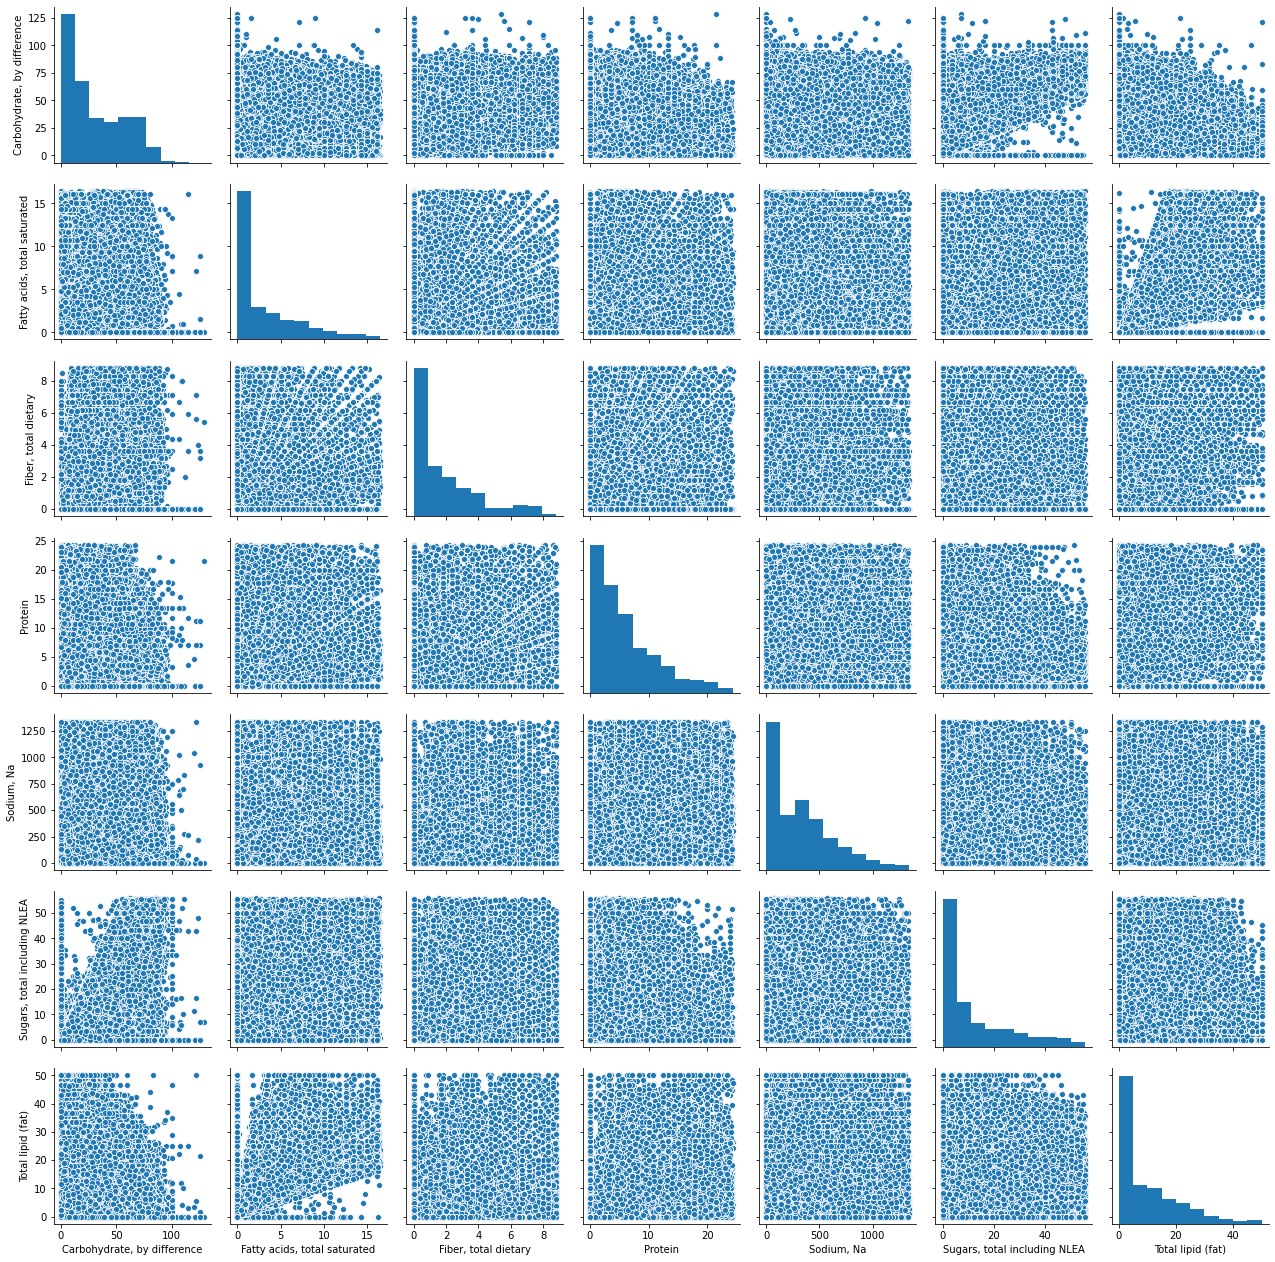

In [164]:
sns.pairplot(X)

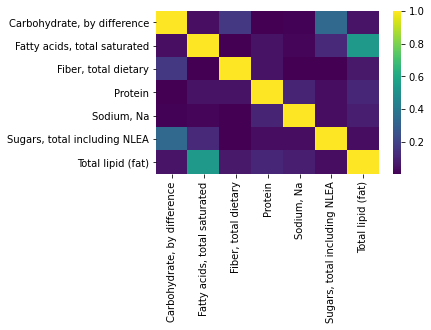

In [165]:
fig = plt.figure(figsize=(5,3))
x_corr = X.corr()**2
sns.heatmap(x_corr, cmap='viridis')

### Standardize

In [166]:
scl = preprocessing.StandardScaler()
scl.fit(X)

X = scl.transform(X)

print(X.shape)
X[0,:]

(192782, 7)


array([-1.04545074, -0.76234687, -0.47622896, -0.94129773, -0.42024203,
       -0.69394867, -0.83254154])

# Part - III

### Train test split

In [167]:
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

print(x_train.shape, x_test.shape)

(144586, 7) (48196, 7)


### Model



In [168]:
def fit_predict(reg):
    reg.fit(x_train, y_train)
    
    y_pred = reg.predict(x_test)
    
    mse = metrics.mean_squared_error(y_test, y_pred)
    print('mse: %.4f' % mse)
    
    r2 = metrics.r2_score(y_test, y_pred)
    print('r2: %.4f' %r2)
    
    plt.scatter(y_test, y_pred, alpha=0.1)
    plt.show()
    
    return mse, r2

-------------------------
Linear Regression
-------------------------
mse: 654.1258
r2: 0.9748


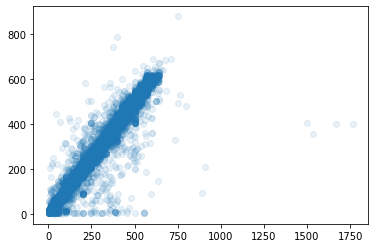

-------------------------
-------------------------
Ridge Regression
-------------------------
mse: 654.1264
r2: 0.9748


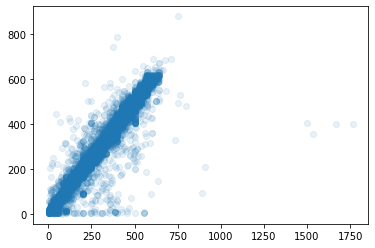

-------------------------
-------------------------
Ridge CV
-------------------------
mse: 654.1264
r2: 0.9748


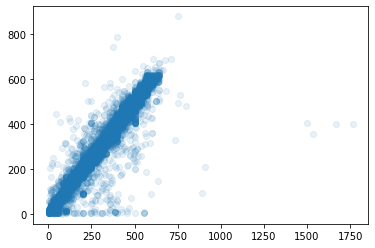

-------------------------
-------------------------
Lasso Regression
-------------------------
mse: 654.4260
r2: 0.9748


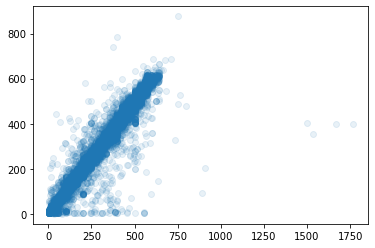

-------------------------
-------------------------
Least Angle Regression (LARS)
-------------------------
mse: 663.0702
r2: 0.9745


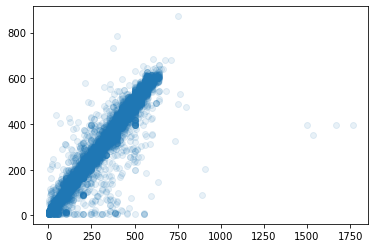

-------------------------
-------------------------
Lasso Lars
-------------------------
mse: 696.7114
r2: 0.9732


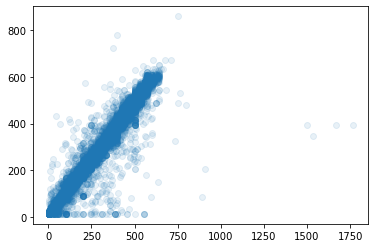

-------------------------
-------------------------
Elastic Net Regression
-------------------------
mse: 2475.7180
r2: 0.9047


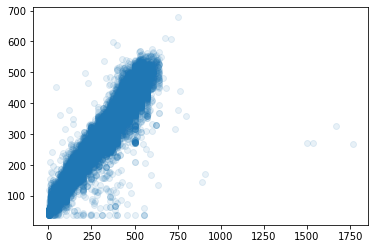

-------------------------
-------------------------
ElasticNet CV Regression
-------------------------
mse: 987.1422
r2: 0.9620


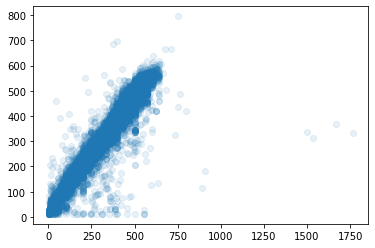

-------------------------


In [170]:
model_list =[
    (linear_model.LinearRegression(), 'Linear Regression'),
    (linear_model.Ridge(), 'Ridge Regression'),
    (linear_model.RidgeCV(), 'Ridge CV'),
    (linear_model.Lasso(alpha=0.1), 'Lasso Regression'),
    (linear_model.Lars(n_nonzero_coefs=5), 'Least Angle Regression (LARS)'),
    (linear_model.LassoLars(alpha=0.01), 'Lasso Lars'),
    (linear_model.ElasticNet(random_state=0), 'Elastic Net Regression'),
    (linear_model.ElasticNetCV(cv=5, random_state=0), 'ElasticNet CV Regression')
]

results=[]

for reg, name in model_list:
    print('-'*25)
    print(name)
    print('-'*25)
    
    results.append((fit_predict(reg), name))
    print('-'*25)

# Congratulations on completing the machine learning project!
## Hope you enjoyed the data analysis. Thank you !!!
### Please like, share and subscribe to learndataa

https://www.youtube.com/c/learndataa

In [2]:
#learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa